In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno
from collections import Counter

In [ ]:
df = pd.read_csv('car_price_prediction.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [ ]:
(df.isnull().sum() / df.shape[0]) * 100

ID                  0.0
Price               0.0
Levy                0.0
Manufacturer        0.0
Model               0.0
Prod. year          0.0
Category            0.0
Leather interior    0.0
Fuel type           0.0
Engine volume       0.0
Mileage             0.0
Cylinders           0.0
Gear box type       0.0
Drive wheels        0.0
Doors               0.0
Wheel               0.0
Color               0.0
Airbags             0.0
dtype: float64

In [ ]:
df.Manufacturer = df.Manufacturer.astype('category')
df.Model = df.Model.astype('category')
df.Category = df.Category.astype('category')
df["Leather interior"] = df["Leather interior"].astype('category')
df["Fuel type"] = df["Fuel type"].astype('category')
df["Gear box type"] = df["Gear box type"].astype('category')
df["Drive wheels"] = df["Drive wheels"].astype('category')
df.Doors = df.Doors.astype('category')
df.Wheel = df.Wheel.astype('category')
df.Color = df.Color.astype('category')

In [ ]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [ ]:
def levy(cols):
    levy = cols[0]
    if levy == '-':
        return np.nan

    return float(levy)

In [ ]:
df['Levy'] = df[['Levy']].apply(levy, axis=1)

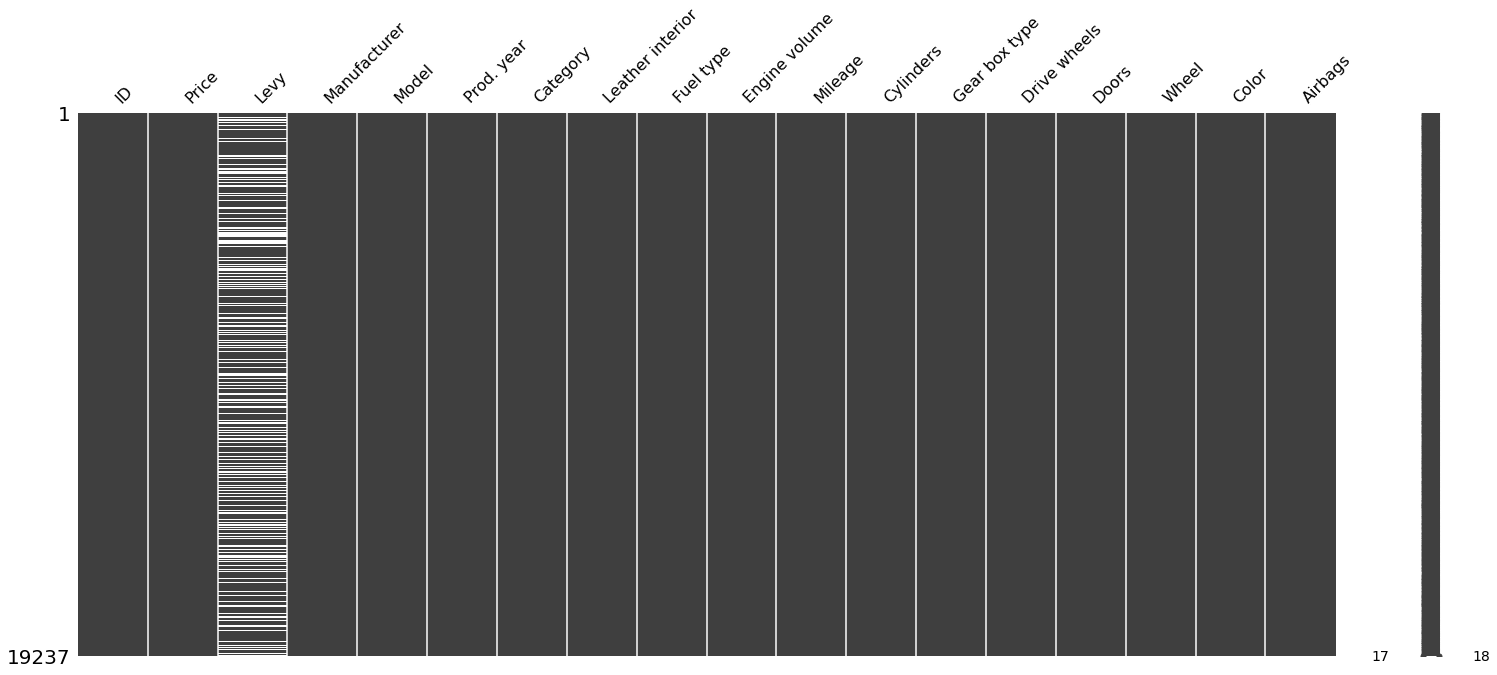

In [ ]:
missingno.matrix(df)

In [ ]:
df.describe()

,ID,Price,Levy,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,13418.000000,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,906.838128,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,461.867051,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,87.000000,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,640.000000,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,781.000000,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,1058.000000,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,11714.000000,2020.000000,16.000000,16.000000


## Category Column

In [ ]:
category_count = df['Category'].value_counts(dropna = False)
category_count

Sedan          8736
Jeep           5473
Hatchback      2847
Minivan         647
Coupe           532
Universal       364
Microbus        306
Goods wagon     233
Pickup           52
Cabriolet        36
Limousine        11
Name: Category, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


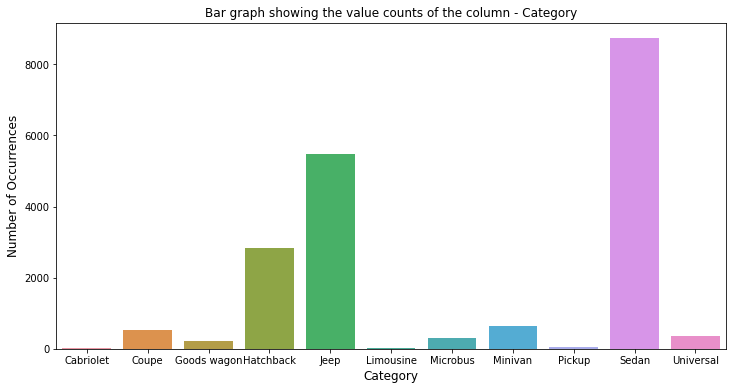

In [ ]:
plt.figure(figsize = (12, 6))
sns.barplot(category_count.index, category_count.values)
plt.title('Bar graph showing the value counts of the column - Category')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Category', fontsize = 12)
plt.show()

Categories  Cabriolet, Coupe, Goods wagon, Limousine, Microbus, Minivan, Pickup, Universal don't have enough data

In [ ]:
mean_price_category = df[['Category', 'Price']].groupby('Category', as_index = False).mean()
mean_price_category

,Category,Price
0,Cabriolet,24583.694444
1,Coupe,21250.406015
2,Goods wagon,122916.180258
3,Hatchback,11381.245873
4,Jeep,23684.285949
5,Limousine,11534.454545
6,Microbus,18550.928105
7,Minivan,20531.221020
8,Pickup,28805.269231
9,Sedan,14231.545902


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


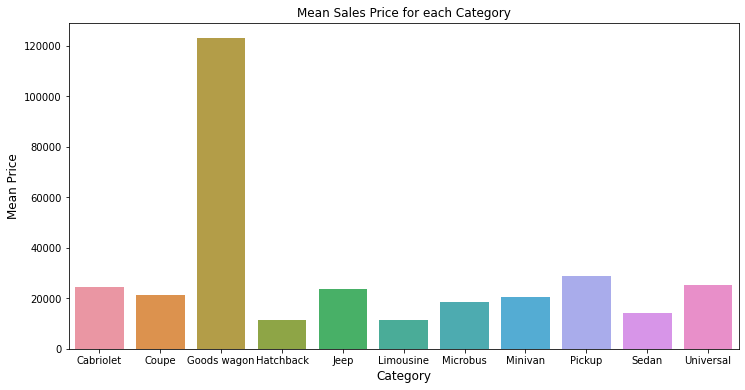

In [ ]:
plt.figure(figsize = (12, 6))
sns.barplot(mean_price_category['Category'], mean_price_category['Price'])
plt.title('Mean Sales Price for each Category')
plt.ylabel('Mean Price', fontsize = 12)
plt.xlabel('Category', fontsize = 12)
plt.show()

 mean price of all the categories is similar

### Since mean price is similar but some categories have insufficient data we will have to change the column

## Leather Interior column


In [ ]:
interior_count = df['Leather interior'].value_counts()
interior_count

Yes    13954
No      5283
Name: Leather interior, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


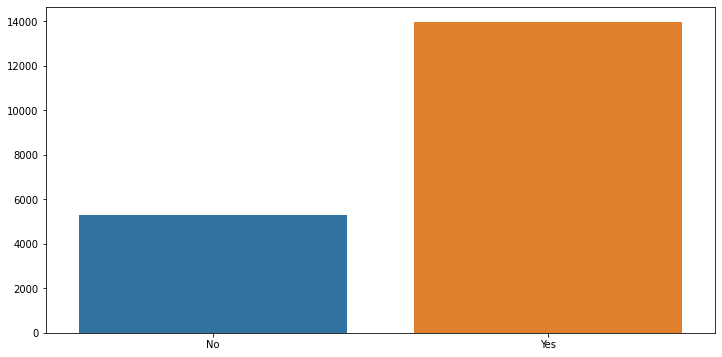

In [ ]:
plt.figure(figsize = (12, 6))
sns.barplot(interior_count.index, interior_count.values)


Most Cars have a leather interior

In [ ]:
interior_mean = df[['Leather interior', 'Price']].groupby('Leather interior', as_index = False).mean()
interior_mean

,Leather interior,Price
0,No,18322.323301
1,Yes,18644.369930


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


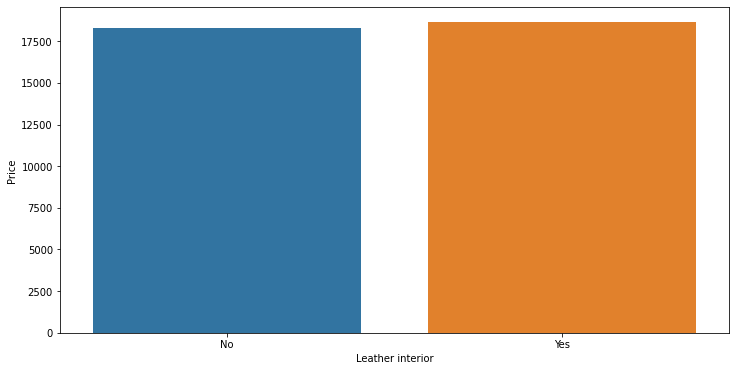

In [ ]:
plt.figure(figsize = (12, 6))
sns.barplot(interior_mean['Leather interior'], interior_mean['Price'])

Mean Price is same if leather interior is present or absent

### Leather Interior Does not matter

## Fuel Type Column

Petrol            10150
Diesel             4036
Hybrid             3578
LPG                 892
CNG                 494
Plug-in Hybrid       86
Hydrogen              1
Name: Fuel type, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


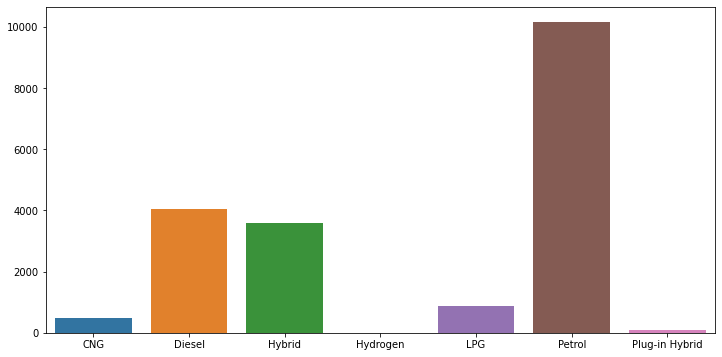

In [ ]:
fuel_type_counts = df['Fuel type'].value_counts()
print(fuel_type_counts)
plt.figure(figsize = (12, 6))
sns.barplot(fuel_type_counts.index, fuel_type_counts.values)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


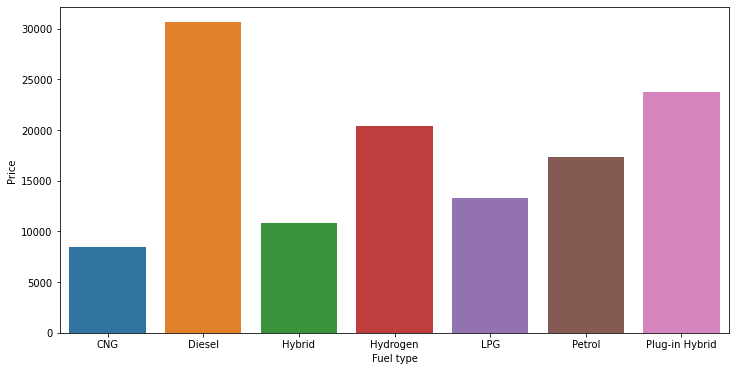

In [ ]:
fuel_type_price = df[['Fuel type', 'Price']].groupby('Fuel type', as_index = False).mean()
plt.figure(figsize = (12, 6))
sns.barplot(fuel_type_price['Fuel type'], fuel_type_price['Price'])

Insufficient data for the fuel types - Hydrogen and Plug-in Hybrid, Mean is different for all

In [ ]:
modified_volume = [float(value.split(' ')[0]) for value in df['Engine volume']]
df['Engine volume'] = modified_volume

In [ ]:
modified_mileage = [float(value.split(' ')[0]) for value in df['Mileage']]
df['Mileage'] = modified_mileage

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ID                19237 non-null  int64   
 1   Price             19237 non-null  int64   
 2   Levy              13418 non-null  float64 
 3   Manufacturer      19237 non-null  category
 4   Model             19237 non-null  category
 5   Prod. year        19237 non-null  int64   
 6   Category          19237 non-null  category
 7   Leather interior  19237 non-null  category
 8   Fuel type         19237 non-null  category
 9   Engine volume     19237 non-null  float64 
 10  Mileage           19237 non-null  float64 
 11  Cylinders         19237 non-null  float64 
 12  Gear box type     19237 non-null  category
 13  Drive wheels      19237 non-null  category
 14  Doors             19237 non-null  category
 15  Wheel             19237 non-null  category
 16  Color             1923

### Remove Hydrogen and Plug-in Hybrid

In [ ]:
def detect_outliers(df, n, features_list):
    outlier_indices = [] 
    for feature in features_list: 
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(df, 2, ['Price', 'Levy', 'Prod. year', 'Mileage', 'Cylinders', 'Airbags','Engine volume'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)




We will drop these 270 indices:  [90, 211, 420, 483, 573, 579, 723, 724, 747, 1019, 1083, 1128, 1225, 1364, 1459, 1490, 1509, 1510, 1562, 1662, 1704, 1823, 2010, 2054, 2283, 2366, 2726, 2768, 2799, 2859, 2912, 2922, 2941, 2942, 3101, 3365, 3487, 3684, 3686, 3705, 3707, 3765, 3905, 4068, 4183, 4237, 4294, 4351, 4465, 4629, 4649, 4661, 4662, 4705, 4709, 4722, 4919, 5008, 5259, 5412, 5485, 5541, 5718, 5731, 5940, 6405, 6468, 6768, 6826, 6873, 6887, 6950, 7010, 7031, 7094, 7147, 7247, 7254, 7283, 7318, 7353, 7565, 7621, 7667, 7675, 7747, 7749, 7760, 7970, 7997, 8036, 8147, 8246, 8541, 8644, 8755, 8880, 9101, 9172, 9212, 9233, 9247, 9259, 9327, 9367, 9405, 9441, 9452, 9688, 9739, 10082, 10085, 10220, 10468, 10520, 10690, 10710, 10714, 10759, 10948, 11035, 11038, 11041, 11131, 11138, 11210, 11529, 11827, 11906, 11941, 11973, 12081, 12152, 12224, 12848, 12905, 12981, 13088, 13320, 13325, 13351, 13467, 13534, 13631, 13653, 13687, 13745, 13847, 13884, 13889, 13941, 13973, 14193, 14356, 14435, 1

In [ ]:

print("Before: {} rows".format(len(df)))
df = df.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(df)))

Before: 19237 rows
After: 18967 rows


In [ ]:
# from matplotlib import cm
# plt.figure(figsize = (12, 6))
# plt.bar(category_count.index, category_count.values, color = 'rgbkymc')

In [ ]:
Manu = pd.get_dummies(df['Manufacturer'], drop_first=True)
Category = pd.get_dummies(df['Category'], drop_first=True)
Interior =  pd.get_dummies(df['Leather interior'], drop_first=True)
Fuel_type = pd.get_dummies(df['Fuel type'], drop_first=True)
GBT = pd.get_dummies(df['Gear box type'], drop_first=True)
Drive_wheels = pd.get_dummies(df['Drive wheels'], drop_first=True)
Doors = pd.get_dummies(df['Doors'], drop_first=True)
Wheels = pd.get_dummies(df['Wheel'], drop_first=True)

In [ ]:
df = df.drop(['Manufacturer', 'Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel'], axis = 1)

In [ ]:
df = pd.concat([df, Manu, Category, Interior, Fuel_type, GBT, Drive_wheels, Doors, Wheels], axis = 1)

In [ ]:
df.head()

,ID,Price,Levy,Model,Prod. year,Engine volume,Mileage,Cylinders,Color,Airbags,...,Petrol,Plug-in Hybrid,Manual,Tiptronic,Variator,Front,Rear,04-May,>5,Right-hand drive
0,45654403,13328,1399.0,RX 450,2010,3.5,186005.0,6.0,Silver,12,...,0,0,0,0,0,0,0,1,0,0
1,44731507,16621,1018.0,Equinox,2011,3.0,192000.0,6.0,Black,8,...,1,0,0,1,0,0,0,1,0,0
2,45774419,8467,NaN,FIT,2006,1.3,200000.0,4.0,Black,2,...,1,0,0,0,1,1,0,1,0,1
3,45769185,3607,862.0,Escape,2011,2.5,168966.0,4.0,White,0,...,0,0,0,0,0,0,0,1,0,0
4,45809263,11726,446.0,FIT,2014,1.3,91901.0,4.0,Silver,4,...,1,0,0,0,0,1,0,1,0,0


Prod Year

In [ ]:
def prodyear(cols):
    Year = cols[0]

    if Year > 1930 and Year <= 1940:
        return 1940
    elif Year > 1940 and Year <= 1950:
        return 1950
    elif Year > 1950 and Year <= 1960:
        return 1960
    elif Year > 1960 and Year <= 1970:
        return 1970
    elif Year > 1970 and Year <= 1980:
        return 1980
    elif Year > 1980 and Year <= 1990:
        return 1990
    elif Year > 1990 and Year <= 2000:
        return 2000
    elif Year > 2000 and Year <= 2010:
        return 2010
    elif Year > 2010 and Year <= 2020:
        return 2020

    return Year

In [ ]:
df['Prod. year'] = df[['Prod. year']].apply(prodyear, axis=1)

In [ ]:
df.loc[df['Engine volume'] == 3.2]

,ID,Price,Levy,Model,Prod. year,Engine volume,Mileage,Cylinders,Color,Airbags,...,Petrol,Plug-in Hybrid,Manual,Tiptronic,Variator,Front,Rear,04-May,>5,Right-hand drive
96,45789555,15053,NaN,E 320,2010,3.2,214000.0,6.0,Grey,8,...,1,0,0,1,0,0,1,1,0,0
274,45622835,8781,NaN,Elgrand,2000,3.2,230000.0,4.0,White,4,...,0,0,0,0,0,0,0,1,0,1
305,45798480,7840,NaN,CLK 320,2000,3.2,255000.0,6.0,Silver,4,...,1,0,0,1,0,0,1,0,0,0
400,45793522,22580,1286.0,Q5,2010,3.2,150400.0,6.0,Grey,7,...,1,0,0,1,0,0,0,1,0,0
462,45785472,12544,NaN,E 320,2010,3.2,205500.0,6.0,Silver,8,...,1,0,0,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18314,45808490,5959,1171.0,Cherokee,2020,3.2,79200.0,6.0,Black,12,...,1,0,0,0,0,1,0,1,0,0
18442,45785988,12544,NaN,E 320,2010,3.2,233000.0,6.0,Silver,6,...,1,0,0,0,0,0,1,1,0,1
18680,45794160,12231,NaN,A6,2010,3.2,256000.0,6.0,Silver,8,...,1,0,0,1,0,0,0,1,0,0
18772,45792773,3200,NaN,20,1960,3.2,100000.0,4.0,Green,0,...,1,0,1,0,0,0,0,0,0,0


In [ ]:
def eng_vol(cols):
    engvol = cols[0]
    try:
        return float(engvol)
    except:
        return float(engvol[:3])

In [ ]:
df['Engine volume'] = df[['Engine volume']].apply(eng_vol, axis=1)

In [ ]:
def mil(cols):
    mile = cols[0]
    
    return float(mile[:-3])

In [ ]:
df.head()

,ID,Price,Levy,Model,Prod. year,Engine volume,Mileage,Cylinders,Color,Airbags,...,Petrol,Plug-in Hybrid,Manual,Tiptronic,Variator,Front,Rear,04-May,>5,Right-hand drive
0,45654403,13328,1399.0,RX 450,2010,3.5,186005.0,6.0,Silver,12,...,0,0,0,0,0,0,0,1,0,0
1,44731507,16621,1018.0,Equinox,2020,3.0,192000.0,6.0,Black,8,...,1,0,0,1,0,0,0,1,0,0
2,45774419,8467,NaN,FIT,2010,1.3,200000.0,4.0,Black,2,...,1,0,0,0,1,1,0,1,0,1
3,45769185,3607,862.0,Escape,2020,2.5,168966.0,4.0,White,0,...,0,0,0,0,0,0,0,1,0,0
4,45809263,11726,446.0,FIT,2020,1.3,91901.0,4.0,Silver,4,...,1,0,0,0,0,1,0,1,0,0


In [ ]:
Years = pd.get_dummies(df['Prod. year'], drop_first = True)

In [ ]:
df = df.drop(['Prod. year'], axis = 1)
df = pd.concat([df, Years], axis = 1)

In [ ]:
df.head()

,ID,Price,Levy,Model,Engine volume,Mileage,Cylinders,Color,Airbags,ALFA ROMEO,...,>5,Right-hand drive,1950,1960,1970,1980,1990,2000,2010,2020
0,45654403,13328,1399.0,RX 450,3.5,186005.0,6.0,Silver,12,0,...,0,0,0,0,0,0,0,0,1,0
1,44731507,16621,1018.0,Equinox,3.0,192000.0,6.0,Black,8,0,...,0,0,0,0,0,0,0,0,0,1
2,45774419,8467,NaN,FIT,1.3,200000.0,4.0,Black,2,0,...,0,1,0,0,0,0,0,0,1,0
3,45769185,3607,862.0,Escape,2.5,168966.0,4.0,White,0,0,...,0,0,0,0,0,0,0,0,0,1
4,45809263,11726,446.0,FIT,1.3,91901.0,4.0,Silver,4,0,...,0,0,0,0,0,0,0,0,0,1


Color

In [ ]:
df = df.drop(['Color'], axis = 1)

Model

In [ ]:
df = df.drop(['Model'], axis = 1)

In [ ]:
df.head()

,ID,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,ALFA ROMEO,ASTON MARTIN,AUDI,...,>5,Right-hand drive,1950,1960,1970,1980,1990,2000,2010,2020
0,45654403,13328,1399.0,3.5,186005.0,6.0,12,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,44731507,16621,1018.0,3.0,192000.0,6.0,8,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,45774419,8467,NaN,1.3,200000.0,4.0,2,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,45769185,3607,862.0,2.5,168966.0,4.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,45809263,11726,446.0,1.3,91901.0,4.0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Price - Levy

In [ ]:
df.loc[df['Price'] == 157]

,ID,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,ALFA ROMEO,ASTON MARTIN,AUDI,...,>5,Right-hand drive,1950,1960,1970,1980,1990,2000,2010,2020
625,45620684,157,1451.0,4.4,139363.0,8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
788,45810428,157,687.0,1.6,195602.0,4.0,12,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1300,45633609,157,640.0,2.0,339920.0,4.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1478,45765858,157,831.0,2.4,0.0,4.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1679,45651661,157,1058.0,3.5,245762.0,6.0,12,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17730,45807439,157,919.0,3.0,221312.0,6.0,12,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18267,45760188,157,1363.0,4.6,189704.0,8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18304,45770136,157,1363.0,4.6,189704.0,8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18342,45766136,157,915.0,3.0,401128.0,6.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
median_levy = df['Levy'].median()
median_levy



781.0

In [ ]:
def levy_impute(cols):
    levy = cols[0]

    if levy == np.nan:
        return 781.0
    
    return levy

In [ ]:


df['Levy'] = df[['Levy']].apply(levy_impute, axis = 1)

Train test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 3:], df.iloc[:, 1], test_size = 0.2)

In [ ]:
df.iloc[:, 1]

0        13328
1        16621
2         8467
3         3607
4        11726
         ...  
18962     8467
18963    15681
18964    26108
18965     5331
18966      470
Name: Price, Length: 18967, dtype: int64

In [ ]:
df.shape

(18967, 104)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18967 entries, 0 to 18966
Columns: 104 entries, ID to 2020
dtypes: float64(4), int64(3), uint8(97)
memory usage: 2.8 MB


# PCA


In [ ]:
# from sklearn.decomposition import PCA
# pca  = PCA(n_components = 20)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

In [ ]:
from sklearn.decomposition import KernelPCA
pca  = KernelPCA(n_components = 20, kernel = 'rbf')
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Model Apply

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

In [ ]:
klbakhsbd

In [ ]:
from xgboost import XGBRegressor

regressor = XGBRegressor(learning_rate = 0.2)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)



In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

In [ ]:
df.info()

In [ ]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression

# poly_regressor = PolynomialFeatures(degree = 3)
# X_poly = poly_regressor.fit_transform(X_train)
# regressor = LinearRegression()
# regressor.fit(X_poly, y_train)

In [ ]:
# poly_X_test = poly_regressor.transform(X_test)
# y_pred = regressor.predict(poly_X_test)
# print(y_pred.shape)
# print(y_test.shape)

In [ ]:
# from sklearn.metrics import r2_score
# from sklearn.metrics import mean_absolute_error

# print(r2_score(y_test, y_pred))
# print(mean_absolute_error(y_test, y_pred))

In [ ]:
from sklearn.svm import SVR

regressor = SVR()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

In [ ]:

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

In [ ]:
y_pred.shape

In [ ]:
print(y_test)

In [ ]:
print(y_pred)

In [ ]:
for i in range(0, y_pred.shape[0]):
    print(y_test[i])
    print(y_pred[i])